Max is 1957-10-01 00:00:00 Min is 1754-01-01 00:00:00 Cycle length in months =  4022 days, 12:58:22.702703


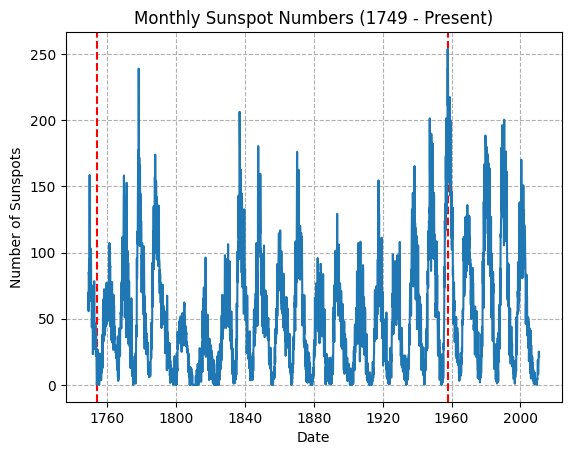

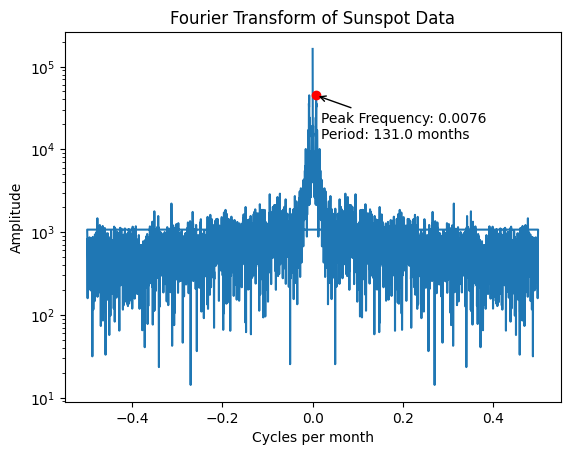

Max period =  130.95833333333334


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


def plot_sunspots():
    with open('sunspots.txt', 'r') as file:
        data = np.loadtxt(file)
        x = data[:, 0]
        y = data[:, 1]
        # show heatmap with origin='lower' so y increases upwards
        dates = [datetime(1749 + x//12, x % 12 + 1, 1) for x in range(len(x))]

        y_min_index = np.argmin(y)
        x_min = dates[y_min_index]
        y_max_index = np.argmax(y)
        x_max =  dates[y_max_index]
        fig, ax = plt.subplots()
        ax.axvline(x_min, color='red', linestyle='--', label=f'')
        ax.axvline(x_max, color='red', linestyle='--', label=f'')

        print("Max is", x_max, "Min is", x_min, "Cycle length in months = ",  (dates[y_max_index] - dates[y_min_index])/18.5)
        im = ax.plot(dates, y)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.title('Monthly Sunspot Numbers (1749 - Present)')
        plt.xlabel('Date')
        plt.ylabel('Number of Sunspots')
        plt.grid(True, which="both", ls="--")
        plt.show()

        freqs, amps  = fourier_transform(y)
        plt.plot(freqs[:-1], amps[:-1])
        plt.yscale('log')
        plt.xlabel("Cycles per month")
        plt.ylabel("Amplitude")
        plt.title("Fourier Transform of Sunspot Data")

        ## Highlight the peak frequency
        peak_freq_index = np.argmax(amps[1:]) + 1  # Skip the zero frequency
        peak_freq = freqs[peak_freq_index]
        peak_amp = amps[peak_freq_index]
        plt.plot(peak_freq, peak_amp, 'ro')  # Mark the peak with a red dot
        plt.annotate(f'Peak Frequency: {peak_freq:.4f}\nPeriod: {1/peak_freq:.1f} months',
                     xy=(peak_freq, peak_amp),
                     xytext=(peak_freq*2.5, peak_amp*0.3),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10)

        plt.show()

        print("Max period = ", 1/freqs[np.argsort(amps)[-2]])

def fourier_transform(data):
    n = len(data)
    freq = np.fft.fftfreq(n)
    fft_values = np.fft.fft(data)
    return freq, np.abs(fft_values)

if  __name__ == "__main__":
    plot_sunspots()
